## Introduction

This project explores the question: **"What is the best neighborhood in Pittsburgh?"**

We used data from WPRDC to analyze three key factors: safety, education access, and amenity availability. Each group member contributed one submetric and analysis. Our goal is to combine these into a single score to rank neighborhoods based on our definition of "bestness."

## The Metric

We define "best" as a neighborhood that:
- Is safer (lower crime rate)
- Has better educational access (higher student enrollment)
- Has greater convenience (more nearby amenities)

Each submetric is normalized to a 0 - 1 scale:

- `Safety Score = 1 - normalized(crime count)`
- `Education Score = normalized(total enrolled students)`
- `Amenity Score = normalized(amenity density per location cluster)`

We assign equal weight to each metric and average them to get the final score:

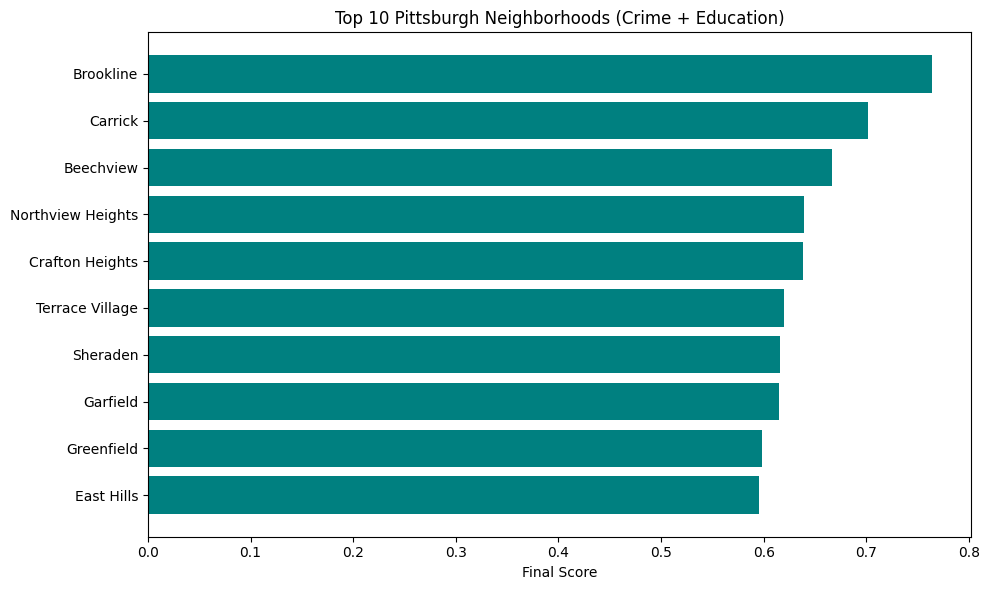

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.makedirs("figures", exist_ok=True)

crime = pd.read_csv("data/crime_scores.csv")
edu = pd.read_csv("data/education_scores.csv")

merged = crime.merge(edu, on="neighborhood", suffixes=("_crime", "_edu"))

merged["final_score"] = merged[["score_crime", "score_edu"]].mean(axis=1)

merged_sorted = merged.sort_values("final_score", ascending=False)
top10 = merged_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top10["neighborhood"], top10["final_score"], color="teal")
plt.xlabel("Final Score")
plt.title("Top 10 Pittsburgh Neighborhoods (Crime + Education)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("figures/final_top10_neighborhoods.png")
plt.show()


### Amenity Score (Supplemental)

Although we were not able to integrate the amenity score into our final composite due to lack of neighborhood-level mapping, we visualized the top 10 amenity-dense locations based on coordinate clusters.

![Top Amenity Areas](figures/top_amenity_blocks.png)

### Understanding the Amenity Score Chart

The vertical axis in our amenity density chart represents approximate "location blocks," formed by rounding the latitude and longitude of each facility to two decimal places. Each block covers roughly a few city blocks in size.

This method groups nearby amenities into clusters and highlights areas of high convenience access, although it does not directly map to neighborhood boundaries.


## Other Submetric Visualizations

### Safety Score (Crime Data)

We calculated a safety score by inverting the normalized crime count in each neighborhood. The chart below shows the ten safest neighborhoods in Pittsburgh.

![Top 10 Safest Neighborhoods](figures/crime_score_map.png)

### Education Score (School Enrollment)

We used total student enrollment per neighborhood as a proxy for educational access. More students suggest more schools or larger school capacities. Below is a bar chart of the top 10 neighborhoods by education score.

![Top 10 Education Neighborhoods](figures/top_education_neighborhoods.png)


In [13]:
merged_sorted.head(3)["neighborhood"].tolist()

['Brookline', 'Carrick', 'Beechview']

## The Best Neighborhood

Based on our combined score from crime and education metrics, the top-ranking neighborhoods in Pittsburgh are:

1. Brookline
2. Carrick
3. Beechview

These results reflect neighborhoods that balance safety and access to education particularly well. While we also analyzed amenity data, we were unable to match it to neighborhood boundaries and therefore did not include it in the final score. However, the amenity results are still informative and are included as a supplemental visualization.

## Conclusion

The data-driven determination of Pittsburgh’s best neighborhood reflects a balance between safety, education access, and convenience. While this may not align with every team member's personal preference, it offers an objective view of neighborhood strengths.

### Reflection

My personal favorite is Shadyside because of its vibrant walkability and community feel. However, our analysis ranked Squirrel Hill South higher, due to its excellent education scores and safety data. This highlights how personal perception and data can differ in interesting ways.